In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
print(tf.__version__)

2.1.0-rc1


# Project Description

In this hands-on project the goal is to build a python code for image classification from scratch to understand the nitty gritties of building and training a model and further to understand the advantages of neural networks. 

First we will implement a simple KNN classifier and later implement a Neural Network to classify the images in the SVHN dataset. 

We will compare the computational efficiency and accuracy between the traditional methods and neural networks

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np

# 1. Data fetching and understand the train/val/test splits

In [0]:
import h5py
f1 = h5py.File('gdrive/My Drive/Colab Notebooks/SVHN_single_grey1.h5', 'r')
print(list(f1.keys()))

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


We are converting them into different datasets as below for processing

In [0]:
X_test  = f1['X_test'][:]
X_train = f1['X_train'][:]
X_val   = f1['X_val'][:]

y_test  = f1['y_test'][:]
y_train = f1['y_train'][:]
y_val   = f1['y_val'][:]

In [0]:
# Close this file
f1.close()

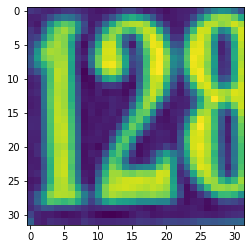

In [0]:
from matplotlib import pyplot as plt  #ploting the first image in X train
plt.imshow(X_train[0])

In [0]:
y_train[0] #corresponding class in y for x train image printed above

2

In [0]:
# checking the shape of each datasets

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (42000, 32, 32) (42000,)
Validation set (60000, 32, 32) (60000,)
Test set (18000, 32, 32) (18000,)


Plotting how the images and correspponding label looks like

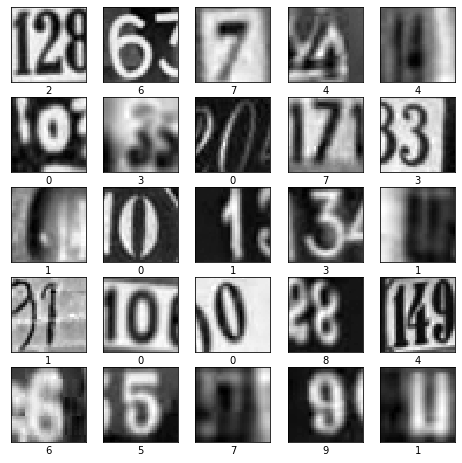

In [0]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

From the above, we can see that each image is classified into a category between 0-9. So we have totally 10 output classes

#### Converting the 10 output classes into a matrix of 0 to num_classes

In [0]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10)

In [0]:
y_train[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
# normalizing the dataset

X_train_norm = X_train/255.0

X_test_norm = X_test/255.0

# 2. Implement and apply an optimal k-Nearest Neighbor (kNN) classifier (7.5 points) 

Since the input images are in 32*32 dimension, converting them into one dimensional so that KNN can be applied on them

In [0]:
X_train_flatten = X_train_norm.reshape(X_train.shape[0], 32 * 32)

In [0]:
X_test_flatten = X_test_norm.reshape(X_test.shape[0], 32 * 32)

**Implementing KNN algorithm**

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
KNN_model = KNeighborsClassifier(n_neighbors=9)

In [0]:
KNN_model.fit(X_train_flatten,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [0]:
y_predict = KNN_model.predict(X_test_flatten)

In [0]:
from sklearn import metrics

In [0]:
KNN_accuracy = metrics.accuracy_score(y_test, y_predict) 

In [0]:
print("Accuracy score of KNN : ",  KNN_accuracy)

Accuracy score of KNN :  0.25983333333333336


The KNN yielded very less accuracy score of 25% with number of nieghbours = 9.

Lets find out the optimal K. The above KNN took lot of time to run since the data set is huge. So to find the optimal K, im taking only first 5K records and running. 

**Finding Optimal K**

In [0]:
X_train_trimmed = X_train_flatten[:5000, :] # take first 5000 for validation
y_train_trimmed = y_train[:5000]

In [0]:
optimalK = 1
optimalTrainAccuracy = 0

In [0]:
maxK = 9

In [23]:
validation_accuracies = []
for k in (1,3,5,7,9):
  
  # use a particular value of k and evaluation on validation data
  NNH = KNeighborsClassifier(n_neighbors=k)
  NNH.fit(X_train_trimmed, y_train_trimmed)
  modelScore = NNH.score(X_train_trimmed, y_train_trimmed)
  if((modelScore > optimalTrainAccuracy) and (k > 1)):
    
    optimalK = k
    optimalTrainAccuracy = modelScore
    
print("optimal",(optimalK, optimalTrainAccuracy))

optimal (3, 0.473)


As seen above optimal value of K is 3

Now Lets implement KNN using the optimal K



**Implement and apply an optimal k-Nearest Neighbor (kNN) classifier (7.5 points) ** 

In [24]:
# Call Nearest Neighbour algorithm
knn_model_optimal = KNeighborsClassifier(n_neighbors=3)
knn_model_optimal.fit(X_train_flatten, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
y_predict_optimal = knn_model_optimal.predict(X_test_flatten) # For every test data point, predict it's outcome

In [28]:
knn_model_optimal_acc = metrics.accuracy_score(y_test, y_predict_optimal) # get the accuracy score 
print("knn model accuracy for optimised K",knn_model_optimal_acc)

knn model accuracy for optimised K 0.3783888888888889


# 3. Print the classification metric report (2.5 points) 

In [0]:
from sklearn.metrics import classification_report

In [34]:
print("Classification Report")
print(classification_report(y_test, y_predict_optimal))

Classification Report
              precision    recall  f1-score   support

           0       0.61      0.44      0.51      1814
           1       0.62      0.51      0.56      1828
           2       0.74      0.40      0.52      1803
           3       0.56      0.27      0.37      1719
           4       0.78      0.51      0.61      1812
           5       0.58      0.25      0.35      1768
           6       0.54      0.29      0.37      1832
           7       0.80      0.54      0.65      1808
           8       0.45      0.25      0.32      1812
           9       0.60      0.32      0.41      1804

   micro avg       0.64      0.38      0.47     18000
   macro avg       0.63      0.38      0.47     18000
weighted avg       0.63      0.38      0.47     18000
 samples avg       0.38      0.38      0.38     18000



In [0]:
from sklearn.metrics import confusion_matrix

In [41]:
knn_val_cm = confusion_matrix(y_test.argmax(axis=1), y_predict_optimal.argmax(axis=1))
print('Confusion matrix: \n', knn_val_cm)

Confusion matrix: 
 [[1494   15    7   17   22   16   76   18   68   81]
 [ 658  940   39   37   50   21   19   42   12   10]
 [ 737   84  713   46   26   16   14   88   33   46]
 [ 811   88   58  471   27  101   28   28   61   46]
 [ 625  104   14   21  918   15   45   12   36   22]
 [ 900   52   20  106   21  443   80   12   80   54]
 [ 926   38   10   28   52   58  524    4  169   23]
 [ 555  103   59   33    7   10   12  984   13   32]
 [ 991   39   13   42   32   48  128    7  449   63]
 [ 914   45   30   39   21   31   45   32   78  569]]


KNN Summary
1. KNN had an accuracy score of 25% with n=9
2. The optimal K is 3
3. With the optimal K, KNN yielded an accuracy of 38%

# 4. Implement and apply a deep neural network classifier including (feedforward  neural network, RELU activations) (5 points)

In [43]:
X_train.shape

(42000, 32, 32)

In [45]:
X_test.shape

(18000, 32, 32)

We have 48000 images in train and 18000 images in test. Now resizing the images to 2D

In [47]:
# input image dimensions
img_rows, img_cols = X_train.shape[1], X_train.shape[2]

#Keras expects data to be in the format (N_E.N_H,N_W,N_C)
#N_E = Number of Examples, N_H = height, N_W = Width, N_C = Number of Channels.
X_train_reshape = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test_reshape = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)
print(X_train_reshape.shape)
print(X_test_reshape.shape)


(42000, 32, 32, 1)
(18000, 32, 32, 1)


**Building the model with 4 hidden layers**

In [0]:
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((img_rows*img_cols,),input_shape=input_shape))

# Adding 4 Hidden layers
model.add(tf.keras.layers.Dense(200, activation='relu', name='Layer_1'))
model.add(tf.keras.layers.Dense(100, activation='relu', name='Layer_2'))
model.add(tf.keras.layers.Dense(200, activation='relu', name='Layer_3'))
model.add(tf.keras.layers.Dense(100, activation='relu', name='Layer_4'))

#Output layer with activation function softmax. Since we have 10 output classes, adding last output layer with 10
model.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

**Compiling the model and printing summary**

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
Layer_1 (Dense)              (None, 200)               205000    
_________________________________________________________________
Layer_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
Layer_3 (Dense)              (None, 200)               20200     
_________________________________________________________________
Layer_4 (Dense)              (None, 100)               20100     
_________________________________________________________________
Output (Dense)               (None, 10)                1010      
Total params: 266,410
Trainable params: 266,410
Non-trainable params: 0
__________________________________________________

**Running the model with 50 epochs and batch size 16**

In [51]:
model.fit(X_train_reshape, y_train, validation_data=(X_test_reshape, y_test), epochs=50,
          batch_size = 16)

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 12s 278us/sample - loss: 2.6900 - accuracy: 0.2159 - val_loss: 1.6757 - val_accuracy: 0.4011
Epoch 2/50
42000/42000 [==============================] - 11s 252us/sample - loss: 1.6624 - accuracy: 0.4241 - val_loss: 1.4967 - val_accuracy: 0.4807
Epoch 3/50
42000/42000 [==============================] - 11s 250us/sample - loss: 1.4787 - accuracy: 0.5012 - val_loss: 1.3568 - val_accuracy: 0.5471
Epoch 4/50
42000/42000 [==============================] - 10s 250us/sample - loss: 1.3603 - accuracy: 0.5503 - val_loss: 1.2054 - val_accuracy: 0.6156
Epoch 5/50
42000/42000 [==============================] - 11s 262us/sample - loss: 1.2925 - accuracy: 0.5769 - val_loss: 1.2572 - val_accuracy: 0.5975
Epoch 6/50
42000/42000 [==============================] - 11s 257us/sample - loss: 1.2519 - accuracy: 0.5936 - val_loss: 1.1806 - val_accuracy: 0.6229
Epoch 7/50
42000/42000 [====================

**The accuracy is 71% on train data and 62% on test data for 50 epochs**

# 5. Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) (2.5 points)

In [0]:
# Initialize Sequential model
model_sgd = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 32*32 size image
model_sgd.add(tf.keras.layers.Reshape((img_rows*img_cols,),input_shape=input_shape))

# Adding 4 Hidden layers
model_sgd.add(tf.keras.layers.Dense(200, activation='relu', name='Layer_1'))
model_sgd.add(tf.keras.layers.Dense(100, activation='relu', name='Layer_2'))
model_sgd.add(tf.keras.layers.Dense(200, activation='relu', name='Layer_3'))
model_sgd.add(tf.keras.layers.Dense(100, activation='relu', name='Layer_4'))

#Output layer
model_sgd.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

In [0]:
# Adding stochastic gradient descent with learning rate 0.001
optimizedsgd=tf.keras.optimizers.SGD(lr=0.001)

In [0]:
#Compiling the Model
model_sgd.compile(optimizer=optimizedsgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
model_sgd.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 1024)              0         
_________________________________________________________________
Layer_1 (Dense)              (None, 200)               205000    
_________________________________________________________________
Layer_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
Layer_3 (Dense)              (None, 200)               20200     
_________________________________________________________________
Layer_4 (Dense)              (None, 100)               20100     
_________________________________________________________________
Output (Dense)               (None, 10)                1010      
Total params: 266,410
Trainable params: 266,410
Non-trainable params: 0
________________________________________________

In [56]:
# Running the model with 50 epochs and batch size 16

model_sgd.fit(X_train_reshape, y_train, validation_data=(X_test_reshape, y_test), epochs=50,
          batch_size = 16)

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 9s 225us/sample - loss: 2.7357 - accuracy: 0.1119 - val_loss: 2.2588 - val_accuracy: 0.1370
Epoch 2/50
42000/42000 [==============================] - 9s 215us/sample - loss: 2.1690 - accuracy: 0.1704 - val_loss: 2.1564 - val_accuracy: 0.1804
Epoch 3/50
42000/42000 [==============================] - 9s 214us/sample - loss: 1.9992 - accuracy: 0.2527 - val_loss: 1.8715 - val_accuracy: 0.2901
Epoch 4/50
42000/42000 [==============================] - 9s 216us/sample - loss: 1.8020 - accuracy: 0.3461 - val_loss: 1.6541 - val_accuracy: 0.3949
Epoch 5/50
42000/42000 [==============================] - 9s 215us/sample - loss: 1.6744 - accuracy: 0.4088 - val_loss: 1.5643 - val_accuracy: 0.4678
Epoch 6/50
42000/42000 [==============================] - 9s 216us/sample - loss: 1.5167 - accuracy: 0.4939 - val_loss: 1.3780 - val_accuracy: 0.5472
Epoch 7/50
42000/42000 [==========================

**The accuracy is 72% on train data and 70% on test data for 50 epochs**

# 6. Implement batch normalization for training the neural network (2.5 points)

In [0]:
# Initialize Sequential model
model_normalized = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 32*32 image
model_normalized.add(tf.keras.layers.Reshape((img_rows*img_cols,),input_shape=input_shape))

#Normalize the data by batch normalisation method
model_normalized.add(tf.keras.layers.BatchNormalization())

# Adding 4 Hidden layers
model_normalized.add(tf.keras.layers.Dense(200, activation='relu', name='Layer_1'))
model_normalized.add(tf.keras.layers.Dense(100, activation='relu', name='Layer_2'))
model_normalized.add(tf.keras.layers.Dense(200, activation='relu', name='Layer_3'))
model_normalized.add(tf.keras.layers.Dense(100, activation='relu', name='Layer_4'))

#Output layer
model_normalized.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

In [0]:
# Adding stochastic gradient descent with learning rate 0.001
optimizedsgd=tf.keras.optimizers.SGD(lr=0.001)

In [0]:
#Compiling the Model
model_normalized.compile(optimizer=optimizedsgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
# summary of the model
model_normalized.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
Layer_1 (Dense)              (None, 200)               205000    
_________________________________________________________________
Layer_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
Layer_3 (Dense)              (None, 200)               20200     
_________________________________________________________________
Layer_4 (Dense)              (None, 100)               20100     
_________________________________________________________________
Output (Dense)               (None, 10)               

In [62]:
# Running the model with 50 epochs and batch size 16

model_normalized.fit(X_train_reshape, y_train, validation_data=(X_test_reshape, y_test), epochs=50,
          batch_size = 16)

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 12s 285us/sample - loss: 2.2838 - accuracy: 0.1369 - val_loss: 2.2300 - val_accuracy: 0.2076
Epoch 2/50
42000/42000 [==============================] - 12s 279us/sample - loss: 2.1725 - accuracy: 0.2435 - val_loss: 2.0413 - val_accuracy: 0.3396
Epoch 3/50
42000/42000 [==============================] - 11s 272us/sample - loss: 1.9355 - accuracy: 0.3627 - val_loss: 1.6957 - val_accuracy: 0.4753
Epoch 4/50
42000/42000 [==============================] - 12s 283us/sample - loss: 1.6510 - accuracy: 0.4627 - val_loss: 1.4040 - val_accuracy: 0.5665
Epoch 5/50
42000/42000 [==============================] - 12s 281us/sample - loss: 1.4543 - accuracy: 0.5318 - val_loss: 1.2282 - val_accuracy: 0.6262
Epoch 6/50
42000/42000 [==============================] - 12s 289us/sample - loss: 1.3296 - accuracy: 0.5735 - val_loss: 1.1171 - val_accuracy: 0.6667
Epoch 7/50
42000/42000 [====================

**The accuracy is 81% on train data and 84% on test data for 50 epochs**

# 7. Understand the differences and trade-offs between traditional and NN classifiers with the help of classification metrics (5 points)

#### 1. Classification reoprt for KNN model with optimal K

In [63]:
print("Classification Report of KNN")
print(classification_report(y_test, y_predict_optimal))
knn_val_cm = confusion_matrix(y_test.argmax(axis=1), y_predict_optimal.argmax(axis=1))
print('Confusion matrix: \n', knn_val_cm)

Classification Report of KNN
              precision    recall  f1-score   support

           0       0.61      0.44      0.51      1814
           1       0.62      0.51      0.56      1828
           2       0.74      0.40      0.52      1803
           3       0.56      0.27      0.37      1719
           4       0.78      0.51      0.61      1812
           5       0.58      0.25      0.35      1768
           6       0.54      0.29      0.37      1832
           7       0.80      0.54      0.65      1808
           8       0.45      0.25      0.32      1812
           9       0.60      0.32      0.41      1804

   micro avg       0.64      0.38      0.47     18000
   macro avg       0.63      0.38      0.47     18000
weighted avg       0.63      0.38      0.47     18000
 samples avg       0.38      0.38      0.38     18000

Confusion matrix: 
 [[1494   15    7   17   22   16   76   18   68   81]
 [ 658  940   39   37   50   21   19   42   12   10]
 [ 737   84  713   46   26   16 

#### 2. Classification report of feed forward NN with Relu activation

In [67]:
print("Classification Report of NN")
y_predict_nn = model.predict(X_test_reshape)
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_predict_nn, axis=1)))
nn_val_cm = confusion_matrix(y_test.argmax(axis=1), y_predict_nn.argmax(axis=1))
print('Confusion matrix: \n', nn_val_cm)

Classification Report of NN
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      1814
           1       0.58      0.71      0.64      1828
           2       0.48      0.64      0.55      1803
           3       0.65      0.50      0.56      1719
           4       0.69      0.78      0.73      1812
           5       0.61      0.63      0.62      1768
           6       0.72      0.62      0.67      1832
           7       0.70      0.51      0.59      1808
           8       0.58      0.58      0.58      1812
           9       0.71      0.62      0.66      1804

    accuracy                           0.63     18000
   macro avg       0.64      0.63      0.63     18000
weighted avg       0.64      0.63      0.63     18000

Confusion matrix: 
 [[1224  130   80   12   74   36   49   20   68  121]
 [  94 1304  111   73   95   24   14   70   34    9]
 [  41   63 1160   76   56   63   17  221   45   61]
 [  60  110  215  851   38  195   

#### 3. Classification report of feed forward NN with Relu activation and with a stoachastic gradient of learning rate 0.001

In [69]:
print("Classification Report of NN with SGD")
y_predict_sgd = model_sgd.predict(X_test_reshape)
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_predict_sgd, axis=1)))
sgd_val_cm = confusion_matrix(y_test.argmax(axis=1), y_predict_sgd.argmax(axis=1))
print('Confusion matrix: \n', sgd_val_cm)

Classification Report of NN with SGD
              precision    recall  f1-score   support

           0       0.76      0.71      0.74      1814
           1       0.58      0.80      0.67      1828
           2       0.77      0.71      0.74      1803
           3       0.71      0.65      0.68      1719
           4       0.61      0.82      0.70      1812
           5       0.74      0.66      0.70      1768
           6       0.72      0.73      0.72      1832
           7       0.75      0.73      0.74      1808
           8       0.76      0.63      0.69      1812
           9       0.80      0.62      0.70      1804

    accuracy                           0.71     18000
   macro avg       0.72      0.71      0.71     18000
weighted avg       0.72      0.71      0.71     18000

Confusion matrix: 
 [[1291   88   15   28  113   17  120   44   35   63]
 [  47 1470   41   39   84   18   24   60   33   12]
 [  24  110 1276   71   68   24   18  140   36   36]
 [  19  204   54 1115   6

#### 4. Classification report of feed forward NN with Relu activation and with a stoachastic gradient of learning rate 0.001 with batch normalization

In [71]:
print("Classification Report of NN with normalized")
y_predict_normalized = model_normalized.predict(X_test_reshape)
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_predict_normalized, axis=1)))
normalized_val_cm = confusion_matrix(y_test.argmax(axis=1), y_predict_normalized.argmax(axis=1))
print('Confusion matrix: \n', normalized_val_cm)

Classification Report of NN with normalized
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1814
           1       0.81      0.88      0.84      1828
           2       0.90      0.84      0.87      1803
           3       0.78      0.80      0.79      1719
           4       0.85      0.89      0.86      1812
           5       0.84      0.82      0.83      1768
           6       0.87      0.79      0.83      1832
           7       0.90      0.87      0.88      1808
           8       0.81      0.81      0.81      1812
           9       0.84      0.81      0.83      1804

    accuracy                           0.84     18000
   macro avg       0.84      0.84      0.84     18000
weighted avg       0.84      0.84      0.84     18000

Confusion matrix: 
 [[1613   27    7   23   29    5   22   14   26   48]
 [  20 1607   16   32   60    7   12   33   26   15]
 [  27   40 1522   46   40   11    5   51   23   38]
 [  21   51   37 1

**Understanding on differences between traditional and NN classifiers**

#### KNN: 

We implemented KNN which yielded 38% accuracy,but the model execution took a lot of time 

Notes on KNN: The Nearest Neighbor Classifier may sometimes be a good choice in some settings (especially if the data is low-dimensional), but it is rarely appropriate for use in practical image classification settings. One problem is that images are high-dimensional objects (i.e. they often contain many pixels), and distances over high-dimensional spaces can be very counter-intuitive.

#### Neural Networks

Feedforward neural network, RELU activations has yielded 63% accuracy.

The neural network with a stochastic radient descent with learning rate 0.001 as yielded 71% accuracy

Batch normalization for training the neural network has yielded 84% accuracy

#### Learning from above models is that the accuracy of image classifiers is better with neural networks. And in neural networks the adding batch normalization and learning rate can improve the accuracy. We may need to find out the optimised values for these on multiple run


# Conclusion

1. Read the image data file and split it into train/test datasets
2. Plotted some images to see how the train/test values looks like
3. Reshaped and flattened the data for running algorithms
4. Implemented KNN classifier. With n=9, it yielded very poor accuracy of 25%. Since the dataset is huge and taking long time to run, we took the first 5K records to find the optimal K. With an optimal K of 3, the accuracy was little bit improved to 38%

5. Built the models with neural networks. Ran the models with epoch 50 and batch size 16
6. Implemented and applied a deep neural network classifier including feedforward  neural network, RELU activations. The accuracy was 63%
7. Then implemented and applied a deep neural network classifier with backpropagation including cost stochastic gradient descent, cross entropy loss, cost functions. The accuracy was improved to 71%
8.  Implemented batch normalization for training the neural network. After batch normalization, the accuracy yielded was 84%
9. Compared differences and trade-offs between traditional and NN classifiers with the help of classification metric. We learn that the neural classifiers yields better result compared to tradtional neural network